TASK 1 FOR LINEAR REGRESSION

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/kaggle'

In [4]:
%cd /content/drive/My Drive/kaggle

/content/drive/My Drive/kaggle


In [5]:
!kaggle datasets download -d gurdit559/canada-per-capita-income-single-variable-data-set

  0% 0.00/637 [00:00<?, ?B/s]
100% 637/637 [00:00<00:00, 170kB/s]


In [6]:
!unzip \*.zip && rm *.zip

Archive:  canada-per-capita-income-single-variable-data-set.zip
replace canada_per_capita_income.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: canada_per_capita_income.csv  


In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statistics as st
import math
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("/content/drive/My Drive/kaggle/canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


# **IMPORTING LINEAR MODEL**

In [9]:
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [10]:
p = df['per capita income (US$)']

In [11]:
from sklearn import linear_model

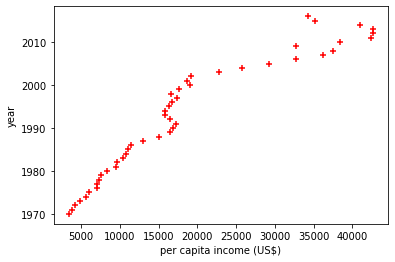

In [12]:
plt.xlabel('per capita income (US$)')
plt.ylabel('year')
plt.scatter(p, df.year , color = 'red', marker = '+')

In [13]:
new_df = df.drop('per capita income (US$)', axis = 'columns')
new_df

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [14]:
model = linear_model.LinearRegression()
model.fit(new_df, p)

LinearRegression()

In [15]:
c = model.predict(new_df)
c

array([ -134.55966672,   693.9054085 ,  1522.37048373,  2350.83555895,
        3179.30063417,  4007.7657094 ,  4836.23078462,  5664.69585984,
        6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 10635.48631118, 11463.9513864 , 12292.41646162,
       13120.88153685, 13949.34661207, 14777.81168729, 15606.27676251,
       16434.74183774, 17263.20691296, 18091.67198818, 18920.1370634 ,
       19748.60213863, 20577.06721385, 21405.53228907, 22233.9973643 ,
       23062.46243952, 23890.92751474, 24719.39258996, 25547.85766519,
       26376.32274041, 27204.78781563, 28033.25289085, 28861.71796608,
       29690.1830413 , 30518.64811652, 31347.11319175, 32175.57826697,
       33004.04334219, 33832.50841741, 34660.97349264, 35489.43856786,
       36317.90364308, 37146.3687183 , 37974.83379353])

In [16]:
new_df['year']= c

In [17]:
new_df.to_csv('predictions.csv')

In [18]:
model.predict([[2020]])

array([41288.69409442])

In [19]:
import pickle


In [21]:
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

In [22]:
with open('model_pickle','rb') as f:
  mp = pickle.load(f)

In [23]:
mp.coef_

array([828.46507522])

In [24]:
mp.intercept_

-1632210.7578554575

In [26]:
mp.predict([[5000]])

array([2510114.61825809])

In [29]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 17.9 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=e87d40db9a36bfd4160b1d12a5ec9e661ff672616bf0d83315b6afa257a543a7
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [33]:
pip install --user joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import joblib

In [37]:
joblib.dump(model, 'model_joblib')

['model_joblib']

In [39]:
mj = joblib.load('model_joblib')

In [42]:
mj.coef_


array([828.46507522])

In [43]:
mj.intercept_

-1632210.7578554575